In [1]:
import config 

In [2]:
'''
Lets print all the variable for the pinouts on board
'''
def get_variable_module_name(module_name):
    module = globals().get(module_name, None)
    variable = {}
    if module:
        variable = {key: value for key, value in module.__dict__.iteritems() if not (key.startswith('__') or key.startswith('_'))}
    return variable

variable = get_variable_module_name('config')
for key, value in variable.iteritems():
    print "{:<20}{:<10}".format(key, value)

Buzzer              5         
Hall_effect_2       0         
Hall_effect_1       1         
R_led               10        
LDR                 5         
Sw                  3         
Ac                  8         
B_led               6         
Pot_1               2         
G_led               9         
Pir                 2         
Pot_2               3         
Temp_1              6         
Pot_3               4         
Temp_2              7         


In [3]:
from phySyncFirmata import ArduinoNano
import phySyncFirmata

In [4]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [5]:
board = ArduinoNano('/dev/ttyUSB0')

In [6]:
# Creates a scrolling data display
class RealtimePlotWindow:

    def __init__(self):
        # create a plot window
        self.fig, self.ax = plt.subplots()
        # that's our plotbuffer
        self.plotbuffer = np.zeros(500)
        # create an empty line
        self.line, = self.ax.plot(self.plotbuffer)
        # axis
        self.ax.set_ylim(0, 1)
        # That's our ringbuffer which accumluates the samples
        # It's emptied every time when the plot window below
        # does a repaint
        self.ringbuffer = []
        # start the animation
        self.ani = animation.FuncAnimation(self.fig, self.update, interval=100)

    # updates the plot
    def update(self, data):
        # add new data to the buffer
        self.plotbuffer = np.append(self.plotbuffer, self.ringbuffer)
        # only keep the 500 newest ones and discard the old ones
        self.plotbuffer = self.plotbuffer[-500:]
        self.ringbuffer = []
        # set the new 500 points of channel 9
        self.line.set_ydata(self.plotbuffer)
        return self.line,

    # appends data to the ringbuffer
    def addData(self, v):
        self.ringbuffer.append(v)

<IPython.core.display.Javascript object>


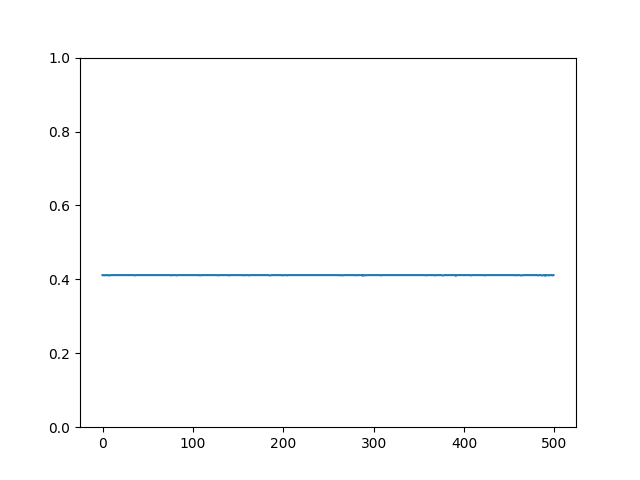

In [7]:
# Create an instance of an animated scrolling window
# To plot more channels just create more instances and add callback handlers below
realtimePlotWindow = RealtimePlotWindow()

# sampling rate: 1000Hz
samplingRate = 100

In [8]:
# called for every new sample which has arrived from the Arduino
def callBack(data):
    # send the sample to the plotwindow
    realtimePlotWindow.addData(data)


In [9]:
# Set the sampling rate in the Arduino
board.samplingOn(1000 / samplingRate)

# Register the callback which adds the data to the animated plot
board.analog[2].register_callback(callBack)

# Enable the callback
board.analog[2].enable_reporting()

# show the plot and start the animation
plt.show()

In [ ]:
# needs to be called to close the serial port
board.exit()

print("finished")
